<a href="https://colab.research.google.com/github/harnalashok/CatEncodersFamily/blob/main/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catencfamily==0.1.18

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 799.2 kB/s eta 0:00:00
  Attempting uninstall: catencfamily
    Found existing installation: catencfamily 0.1.17
    Uninstalling catencfamily-0.1.17:
      Successfully uninstalled catencfamily-0.1.17


In [3]:
#code starts

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from catencfamily.encoders import CatEncodersFamily
from catencfamily import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'leidenalg', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'infomap'}


In [ ]:
# 2.0 Read breast cancer Data
data = pd.read_csv("https://raw.githubusercontent.com/harnalashok/CatEncodersFamily/main/datasets/breastcancer.csv")

# 2.1 Check the first few rows of the dataset
print(data.head(3))

# 2.2 Check the shape of the dataset
print(data.shape)

# 2.3 Map target to 0 and 1
data['diagnosis'] = data['diagnosis'].map({"M": 1, "B": 0})

# 2.4 Proportions of 1s and 0s
print(data['diagnosis'].value_counts(normalize=True))

# 2.5 Remove unwanted columns
data.drop(columns=["id", "Unnamed: 32"], inplace=True)

# 2.6 Check nulls and any need for imputing
print(data.isnull().sum().sum())

# 2.7 Rename columns having spaces
data = data.rename(columns={
    "concave points_mean": "concave_points_mean",
    "concave points_se": "concave_points_se",
    "concave points_worst": "concave_points_worst",
    "area_mean": "areaMean",
    "area_se": "areaSe",
    "texture_mean": "textureMean",
    "concavity_worst": "concavityWorst",
    "concavity_mean": "concavityMean"
})

# 2.8 Pop out target
y = data.pop("diagnosis")

# 3.0 Readjust column names
best_features = ["areaMean", "areaSe", "textureMean", "concavityWorst", "concavityMean"]


In [6]:

# 4.0 Define categorical columns
cat_cols = list(best_features)

# Instantiate CatEncodersFamily class
ct = CatEncodersFamily(
    cMeasures=[1, 1, 1, 1, None, 1, 1],
    saveGraph=False
)

In [27]:
# Define a dictionary containing categorical columns and interacting categorical columns
mydict = {
    'cat_cols': cat_cols,
    'interactingCatCols': cat_cols,
    'dataCols' : best_features
}


In [28]:
"""
ct.fit(data[best_features],
       cat_cols= best_features,
       interactingCatCols = best_features,
       dataCols = best_features
       )
 """

CatEncodersFamily(avoidInteractionFeatures=[],
                  cMeasures=[1, 1, 1, 1, None, 1, 1], mergelevelsincols=[],
                  pathToStoreProgress=PosixPath('/content/allmodels/progress'))

In [8]:
# Define the pipeline including preprocessing and classification
#n_components = min(train_binned.shape[0], train_binned.shape[1])
pipeline = Pipeline([('kb', KBinsDiscretizer(n_bins = 30,
                                             encode = 'ordinal',
                                             strategy='kmeans',
                                             dtype = np.float32)),
    ('ct', ct),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('pca', PCA(n_components=2, whiten=True, random_state=None)),

])

In [9]:
# There are double underscore here:
pipeline.fit(data[best_features],
             y,
             ct__cat_cols = cat_cols,
             ct__interactingCatCols = cat_cols,
             ct__dataCols= best_features
             )




====Takes time...



Pipeline(steps=[('kb',
                 KBinsDiscretizer(dtype=<class 'numpy.float32'>,
                                  encode='ordinal', n_bins=30,
                                  strategy='kmeans')),
                ('ct',
                 CatEncodersFamily(avoidInteractionFeatures=[],
                                   cMeasures=[1, 1, 1, 1, None, 1, 1],
                                   mergelevelsincols=[],
                                   pathToStoreProgress=PosixPath('/content/allmodels/progress'))),
                ('imputer', SimpleImputer(strategy='median')),
                ('pca', PCA(n_components=2, whiten=True))])

In [11]:
X_train = pipeline.transform(data[best_features])





====Takes time...



In [12]:
X_train.shape

(569, 2)

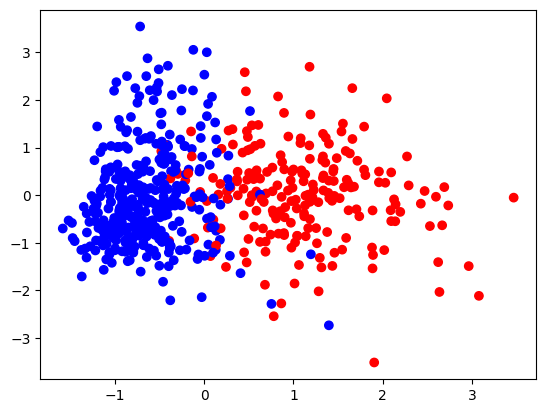

In [25]:
_= plt.scatter(X_train[:,0],X_train[:,1],
            color = ['red' if v == 1 else 'green' if v == 2 else 'blue' for v in y])

In [ ]:
###################